# U - Net
## Problem: 

Seismic data is collected using reflection seismology, or seismic reflection. The method requires a controlled seismic source of energy, such as compressed air or a seismic vibrator, and sensors record the reflection from rock interfaces within the subsurface. The recorded data is then processed to create a 3D view of earth’s interior. Reflection seismology is similar to X-ray, sonar and echolocation.

A seismic image is produced from imaging the reflection coming from rock boundaries. The seismic image shows the boundaries between different rock types. In theory, the strength of reflection is directly proportional to the difference in the physical properties on either sides of the interface. While seismic images show rock boundaries, they don't say much about the rock themselves; some rocks are easy to identify while some are difficult.

There are several areas of the world where there are vast quantities of salt in the subsurface. One of the challenges of seismic imaging is to identify the part of subsurface which is salt. Salt has characteristics that makes it both simple and hard to identify. Salt density is usually 2.14 g/cc which is lower than most surrounding rocks. The seismic velocity of salt is 4.5 km/sec, which is usually faster than its surrounding rocks. This difference creates a sharp reflection at the salt-sediment interface. Usually salt is an amorphous rock without much internal structure. This means that there is typically not much reflectivity inside the salt, unless there are sediments trapped inside it. The unusually high seismic velocity of salt can create problems with seismic imaging.

### Data
The data is a set of images chosen at various locations chosen at random in the subsurface. The images are 101 x 101 pixels and each pixel is classified as either salt or sediment. In addition to the seismic images, the depth of the imaged location is provided for each image. The goal of the competition is to segment regions that contain salt.

#### Source: 
https://www.kaggle.com/c/tgs-salt-identification-challenge


### Note: 
Accept the terms and download data from the above link

### Aim: 

Implement U-Net neural model architecture in keras to solve this problem.


In this, you are asked to segment salt deposits beneath the Earth’s surface. Given a set of seismic images that are 101 x 101 pixels each and each pixel we need to classify as either salt or sediment. Our goal is to segment regions that contain salt. A seismic image is produced from imaging the reflection coming from rock boundaries. The seismic image shows the boundaries between different rock types. 

### Broad Steps:

1. Download the dataset
2. Upload to Drive
3. Import from drive to colab
4. Load the images and create training data.
5. Build U-net Model
6. Train your model.
7. Check the validation accuracy and plot sample.

In [1]:
#Importing necessary libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
#Mount drive
#from google.colab import drive
#drive.mount('/content/drive/')

### 1.Set your project path where you have your data and related files for this lab.

In [3]:
import os
os.chdir('D:/ZipFiles/tgs-salt-identification-challenge')
path = '.'

In [4]:
pwd

'D:\\ZipFiles\\tgs-salt-identification-challenge'

### 2. Set the necessary parameters

## Setup

In [5]:
im_width = 128      #width of your train image
im_height = 128     #hight of your train image
#border =  
HEIGHT_CELLS = 28
WIDTH_CELLS = 28

CELL_WIDTH = im_width / WIDTH_CELLS
CELL_HEIGHT = im_height / HEIGHT_CELLS

path_train = path + 'train/'   #Path for your train data

In [6]:
mylistimages  = os.listdir('D:/ZipFiles/tgs-salt-identification-challenge/train/images')
mylistmasks = os.listdir('D:/ZipFiles/tgs-salt-identification-challenge/train/masks')

# 3. Make directory for train data at in your project/lab folder.

Hint - use !mkdir function.

In [7]:
masks = []
original = []
for filename in mylistmasks:
    masks.append(filename)

In [8]:
for filename in mylistimages:
    original.append(filename)

# 4. Extract your train images to the train directory you have just created above. 
train.zip and test.zip files available at your google drive/local system.

As a good practice - Upload or copy the data at your project path folder.

Make sure you are providing the right project_path.

In [9]:
#For simplicity we have added the required code here.
#from zipfile import ZipFile

#with ZipFile(project_path + 'train.zip', 'r') as zf:
  #zf.extractall('train/')


In [10]:
#The train file have both images and masks with the same names_ids.

In [11]:
original

['000e218f21.png',
 '003c477d7c.png',
 '00441f1cf2.png',
 '0050766ae2.png',
 '005b452274.png',
 '0061281eea.png',
 '008a50a2ec.png',
 '00950d1627.png',
 '00a3af90ab.png',
 '00cda0328c.png',
 '0108518d1e.png',
 '010ee525b6.png',
 '0115703825.png',
 '01323211a0.png',
 '016fc8031c.png',
 '019afb4b4e.png',
 '01b5362cce.png',
 '01c033e116.png',
 '01c2045d03.png',
 '020376e68e.png',
 '020678ec1b.png',
 '02117a400e.png',
 '021494f3aa.png',
 '02206b234e.png',
 '022b1b01be.png',
 '023d486fba.png',
 '0243477802.png',
 '0249c49180.png',
 '026b509cd4.png',
 '026f97575b.png',
 '0280db420c.png',
 '0280deb8ae.png',
 '029c321179.png',
 '02adf272e9.png',
 '02d40993ab.png',
 '03049b14ca.png',
 '0304e9ac37.png',
 '03511989ac.png',
 '0389fc6012.png',
 '03a9a9f615.png',
 '03be56aa9a.png',
 '03c9b5ffe8.png',
 '03eed26d3e.png',
 '0401ae15d3.png',
 '04182ced8e.png',
 '041925f04c.png',
 '04234be388.png',
 '0429d9759b.png',
 '042c3d4e03.png',
 '04315b9a64.png',
 '044106f759.png',
 '045c5516a2.png',
 '0461a2fb30

In [12]:
masks

['000e218f21.png',
 '003c477d7c.png',
 '00441f1cf2.png',
 '0050766ae2.png',
 '005b452274.png',
 '0061281eea.png',
 '008a50a2ec.png',
 '00950d1627.png',
 '00a3af90ab.png',
 '00cda0328c.png',
 '0108518d1e.png',
 '010ee525b6.png',
 '0115703825.png',
 '01323211a0.png',
 '016fc8031c.png',
 '019afb4b4e.png',
 '01b5362cce.png',
 '01c033e116.png',
 '01c2045d03.png',
 '020376e68e.png',
 '020678ec1b.png',
 '02117a400e.png',
 '021494f3aa.png',
 '02206b234e.png',
 '022b1b01be.png',
 '023d486fba.png',
 '0243477802.png',
 '0249c49180.png',
 '026b509cd4.png',
 '026f97575b.png',
 '0280db420c.png',
 '0280deb8ae.png',
 '029c321179.png',
 '02adf272e9.png',
 '02d40993ab.png',
 '03049b14ca.png',
 '0304e9ac37.png',
 '03511989ac.png',
 '0389fc6012.png',
 '03a9a9f615.png',
 '03be56aa9a.png',
 '03c9b5ffe8.png',
 '03eed26d3e.png',
 '0401ae15d3.png',
 '04182ced8e.png',
 '041925f04c.png',
 '04234be388.png',
 '0429d9759b.png',
 '042c3d4e03.png',
 '04315b9a64.png',
 '044106f759.png',
 '045c5516a2.png',
 '0461a2fb30

### 5. Get the list of names of images and masks and name the list imagelist and masklist.

Hint - Use os.listdir() funtions.

In [13]:
print(mylistimages)

['000e218f21.png', '003c477d7c.png', '00441f1cf2.png', '0050766ae2.png', '005b452274.png', '0061281eea.png', '008a50a2ec.png', '00950d1627.png', '00a3af90ab.png', '00cda0328c.png', '0108518d1e.png', '010ee525b6.png', '0115703825.png', '01323211a0.png', '016fc8031c.png', '019afb4b4e.png', '01b5362cce.png', '01c033e116.png', '01c2045d03.png', '020376e68e.png', '020678ec1b.png', '02117a400e.png', '021494f3aa.png', '02206b234e.png', '022b1b01be.png', '023d486fba.png', '0243477802.png', '0249c49180.png', '026b509cd4.png', '026f97575b.png', '0280db420c.png', '0280deb8ae.png', '029c321179.png', '02adf272e9.png', '02d40993ab.png', '03049b14ca.png', '0304e9ac37.png', '03511989ac.png', '0389fc6012.png', '03a9a9f615.png', '03be56aa9a.png', '03c9b5ffe8.png', '03eed26d3e.png', '0401ae15d3.png', '04182ced8e.png', '041925f04c.png', '04234be388.png', '0429d9759b.png', '042c3d4e03.png', '04315b9a64.png', '044106f759.png', '045c5516a2.png', '0461a2fb30.png', '04711cb760.png', '0473e496e2.png', '0497f2d4

In [14]:
print(mylistmasks)

['000e218f21.png', '003c477d7c.png', '00441f1cf2.png', '0050766ae2.png', '005b452274.png', '0061281eea.png', '008a50a2ec.png', '00950d1627.png', '00a3af90ab.png', '00cda0328c.png', '0108518d1e.png', '010ee525b6.png', '0115703825.png', '01323211a0.png', '016fc8031c.png', '019afb4b4e.png', '01b5362cce.png', '01c033e116.png', '01c2045d03.png', '020376e68e.png', '020678ec1b.png', '02117a400e.png', '021494f3aa.png', '02206b234e.png', '022b1b01be.png', '023d486fba.png', '0243477802.png', '0249c49180.png', '026b509cd4.png', '026f97575b.png', '0280db420c.png', '0280deb8ae.png', '029c321179.png', '02adf272e9.png', '02d40993ab.png', '03049b14ca.png', '0304e9ac37.png', '03511989ac.png', '0389fc6012.png', '03a9a9f615.png', '03be56aa9a.png', '03c9b5ffe8.png', '03eed26d3e.png', '0401ae15d3.png', '04182ced8e.png', '041925f04c.png', '04234be388.png', '0429d9759b.png', '042c3d4e03.png', '04315b9a64.png', '044106f759.png', '045c5516a2.png', '0461a2fb30.png', '04711cb760.png', '0473e496e2.png', '0497f2d4

In [15]:
#Test your list names by printing some of the names as given below.
print(mylistimages[-1])
print(mylistmasks[-1])
print(mylistimages[10])
print(mylistmasks[10])

fff987cdb3.png
fff987cdb3.png
0108518d1e.png
0108518d1e.png


In [16]:
original[0]

'000e218f21.png'

In [17]:
masks[0]

'000e218f21.png'

# 6. Read and test your images and respective masks.

Hint -

import  matplotlib.pyplot as plt

import cv2

plt.imshow(cv2.imread('path of image'))

plt.imshow(cv2.imread('path of mask'))


In [18]:
import cv2
import matplotlib.pyplot as plt

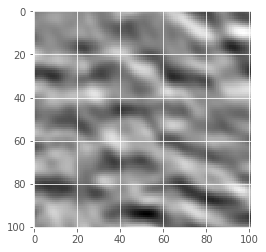

In [19]:
plt.imshow(cv2.imread('D:/ZipFiles/tgs-salt-identification-challenge/train/images/000e218f21.png'))

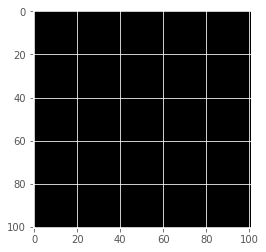

In [20]:
plt.imshow(cv2.imread('D:/ZipFiles/tgs-salt-identification-challenge/train/masks/000e218f21.png'))

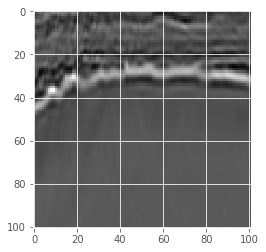

In [21]:
plt.imshow(cv2.imread('D:/ZipFiles/tgs-salt-identification-challenge/train/images/fff987cdb3.png'))

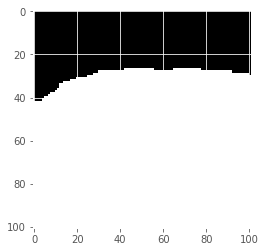

In [22]:
plt.imshow(cv2.imread('D:/ZipFiles/tgs-salt-identification-challenge/train/masks/fff987cdb3.png'))

# 7. Create your training data.

Hints - 

image_path = os.path.join(project_path +'path of your image directory' +n )

mask_path = os.path.join(project_path +'path of your mask directory'+n )

In [23]:
# Get and resize train images and masks
from PIL import Image
import numpy as np
def get_data():
    X = np.zeros(((len(original), im_height, im_width, 1)), dtype=np.float32) # Create an array for image
    y = np.zeros(((len(masks), im_height, im_width, 1)), dtype=np.float32) #Create an array for mask
    print('Shape of X ',X.shape,'\n')
    print('Shape of y ',y.shape,'\n')
    #print('X ',X,'\n')
    #print('y '+y+'\n')
    for file in original:
        n = original.index(file)
        img = cv2.imread('D:/ZipFiles/tgs-salt-identification-challenge/train/images/'+file,2)
        img = resize(img,(im_height, im_width,1),mode='constant', preserve_range = True)
        
        mask = cv2.imread('D:/ZipFiles/tgs-salt-identification-challenge/train/masks/'+masks[n],2)
        mask = resize(mask,(im_height, im_width,1),mode='constant', preserve_range = True)
        
        # Save images
        X[n, ..., 0] = img.squeeze() / 255
        y[n] = mask/255
    print('Done!')
    #if train:
    return X, y
    
X, y = get_data()

Shape of X  (4000, 128, 128, 1) 

Shape of y  (4000, 128, 128, 1) 



C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Done!


In [24]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2019)

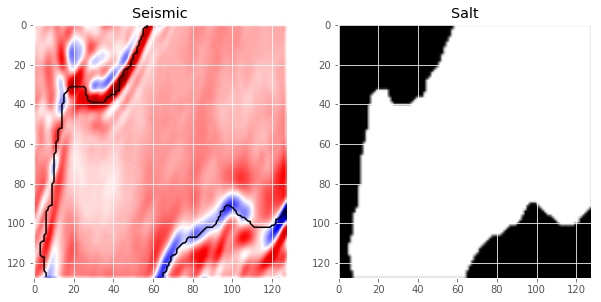

In [25]:
## Test your data whether it looks fine - Random check
import random 
# Check if training data looks all right
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(X_train[ix, ..., 0], cmap='seismic', interpolation='bilinear')
if has_mask:
    ax[0].contour(y_train[ix].squeeze(), colors='k', levels=[0.5])
ax[0].set_title('Seismic')

ax[1].imshow(y_train[ix].squeeze(), interpolation='bilinear', cmap='gray')
ax[1].set_title('Salt');




### 8. Define loss and dice_coeff function.

In [26]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [27]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### 9. Build and compile UNet Model for your data.

Hint - 
You can install and use segmentation models from this github repository.

#Install segmentation models

!pip install git+https://github.com/qubvel/segmentation_models

In [28]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

from keras.layers import Input, Conv2D, Reshape
from keras.models import Model

from keras.layers import Reshape
N = X_train.shape[-1]

Segmentation Models: using `keras` framework.


In [29]:
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

In [30]:
#!pip install tensorflow==1.4.0

In [31]:
tf.__version__

'1.14.0'

In [32]:
pip list

Package                            Version   
---------------------------------- ----------
absl-py                            0.8.1     
alabaster                          0.7.12    
anaconda-client                    1.7.2     
anaconda-navigator                 1.9.7     
anaconda-project                   0.8.2     
asn1crypto                         0.24.0    
astor                              0.8.0     
astroid                            2.2.5     
astropy                            3.1.2     
atomicwrites                       1.3.0     
attrs                              19.1.0    
Babel                              2.6.0     
backcall                           0.1.0     
backports.os                       0.1.1     
backports.shutil-get-terminal-size 1.0.0     
beautifulsoup4                     4.7.1     
bitarray                           0.8.3     
bkcharts                           0.2       
bleach                             3.1.0     
bokeh                             

In [33]:
#pip uninstall tensorflow-gpu

In [34]:
#import tensorflow as tf
#tf.disable_v2_behavior() 

In [35]:
#tf.__version__

In [36]:
#model = Unet(backbone_name='resnet34', encoder_weights='imagenet')
model = Unet(backbone_name='resnet34', encoder_weights=None, input_shape=(None, None, 1))
#compile your model by adding the parameters like optimizer, loss and metrics.
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [37]:
#Get the summary of your model
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, None, None, 1 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 1 3           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 1 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 3136        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

stage3_unit1_bn2 (BatchNormaliz (None, None, None, 2 1024        stage3_unit1_conv1[0][0]         
__________________________________________________________________________________________________
stage3_unit1_relu2 (Activation) (None, None, None, 2 0           stage3_unit1_bn2[0][0]           
__________________________________________________________________________________________________
zero_padding2d_18 (ZeroPadding2 (None, None, None, 2 0           stage3_unit1_relu2[0][0]         
__________________________________________________________________________________________________
stage3_unit1_conv2 (Conv2D)     (None, None, None, 2 589824      zero_padding2d_18[0][0]          
__________________________________________________________________________________________________
stage3_unit1_sc (Conv2D)        (None, None, None, 2 32768       stage3_unit1_relu1[0][0]         
__________________________________________________________________________________________________
add_8 (Add

add_16 (Add)                    (None, None, None, 5 0           stage4_unit3_conv2[0][0]         
                                                                 add_15[0][0]                     
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, None, None, 5 2048        add_16[0][0]                     
__________________________________________________________________________________________________
relu1 (Activation)              (None, None, None, 5 0           bn1[0][0]                        
__________________________________________________________________________________________________
decoder_stage0_upsampling (UpSa (None, None, None, 5 0           relu1[0][0]                      
__________________________________________________________________________________________________
decoder_stage0_concat (Concaten (None, None, None, 7 0           decoder_stage0_upsampling[0][0]  
          

### 10. Fit your model using model.fit function.
Hint - As it might take long time to run. Run it for only 1 or 2 epochs.

In [38]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=25,    
    epochs=2,
    validation_data=(X_valid, y_valid)
)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Train on 3400 samples, validate on 600 samples
Epoch 1/2
3400/3400 [==============================] - ETA: 28:08 - loss: -13.9822 - dice_coefficient: 1.081 - ETA: 19:02 - loss: -13.2937 - dice_coefficient: 1.109 - ETA: 15:56 - loss: -18.7000 - dice_coefficient: 1.139 - ETA: 14:25 - loss: -22.8722 - dice_coefficient: 1.190 - ETA: 13:28 - loss: -30.9439 - dice_coefficient: 1.214 - ETA: 12:46 - loss: -35.1691 - dice_coefficient: 1.250 - ETA: 12:16 - loss: -43.2499 - dice_coefficient: 1.287 - ETA: 11:54 - loss: -44.9070 - dice_coefficient: 1.321 - ETA: 11:38 - loss: -56.2010 - dice_coefficient: 1.343 - ETA: 11:26 - loss: -63.0710 - dice_coefficient: 1.366 - ETA: 11:14 - loss: -68.5244 - dice_coefficient: 1.385 - ETA: 11:04 - loss: -72.7830 - dice_coefficient: 1.395 - ETA: 10:51 - loss: -82.2297 - dice_coefficient: 1.405 - ETA: 10:40 - loss: -89.3465 - dice_coefficient: 1.

3400/3400 [==============================] - ETA: 10:39 - loss: -2139.4910 - dice_coefficient: 1.828 - ETA: 10:18 - loss: -2152.7460 - dice_coefficient: 1.871 - ETA: 10:07 - loss: -2218.4592 - dice_coefficient: 1.856 - ETA: 10:05 - loss: -2220.4478 - dice_coefficient: 1.852 - ETA: 9:59 - loss: -2257.9811 - dice_coefficient: 1.862 - ETA: 9:52 - loss: -2246.1304 - dice_coefficient: 1.85 - ETA: 9:49 - loss: -2120.4022 - dice_coefficient: 1.86 - ETA: 9:45 - loss: -2226.5026 - dice_coefficient: 1.86 - ETA: 9:40 - loss: -2280.6913 - dice_coefficient: 1.86 - ETA: 9:34 - loss: -2173.6166 - dice_coefficient: 1.86 - ETA: 9:31 - loss: -2133.7543 - dice_coefficient: 1.86 - ETA: 9:25 - loss: -2151.5120 - dice_coefficient: 1.86 - ETA: 9:20 - loss: -2210.5300 - dice_coefficient: 1.86 - ETA: 9:16 - loss: -2221.5304 - dice_coefficient: 1.86 - ETA: 9:12 - loss: -2272.9659 - dice_coefficient: 1.85 - ETA: 9:07 - loss: -2306.1444 - dice_coefficient: 1.85 - ETA: 9:02 - loss: -2319.7444 - dice_coefficient: 1

### 11.Predict on val set using model.predict funtion and store in preds_val variable.



In [39]:
preds_val = model.predict(X_valid)

In [40]:
preds_val

array([[[[0.8952879 ],
         [0.9778986 ],
         [0.995108  ],
         ...,
         [0.96967727],
         [0.9665967 ],
         [0.91425073]],

        [[0.9064958 ],
         [0.9968915 ],
         [0.99846   ],
         ...,
         [0.9920957 ],
         [0.99380565],
         [0.96709764]],

        [[0.88793635],
         [0.99210894],
         [0.9968284 ],
         ...,
         [0.9837569 ],
         [0.9947248 ],
         [0.9663267 ]],

        ...,

        [[0.97374564],
         [0.97139096],
         [0.8480936 ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.98626506],
         [0.9852207 ],
         [0.89040565],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.9622965 ],
         [0.96499974],
         [0.8562975 ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[0.67038727],
         [0.743007  ],
         [0.81

In [46]:
#Get the threshold predictions to look at refined results.
preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [47]:
#Plot a sample
def plot_sample(X, y, preds, binary_preds, ix=None):
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Seismic')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Salt')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Salt Predicted')
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('Salt Predicted binary');

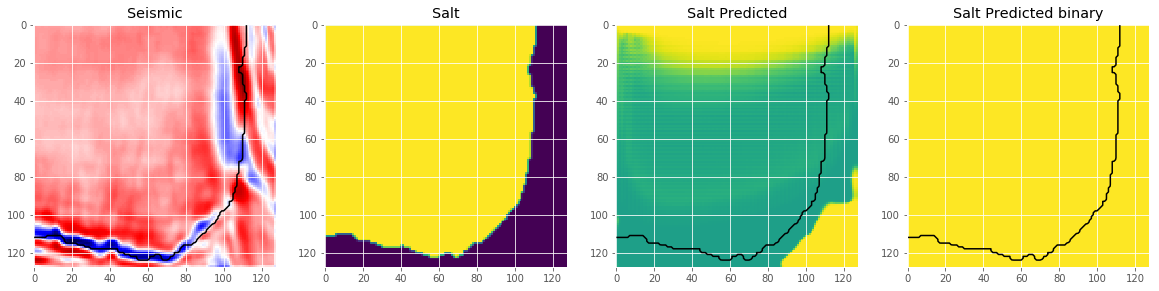

In [50]:
# Check if valid data looks all right
plot_sample(X_valid, y_valid, preds_val, preds_val_t, ix=120)

If you are getting good results- Congratulations.
If you are not, try to explore what might be the reason.